In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wrn
from datetime import datetime
from matplotlib import style

style.use('ggplot')

## Ignore warnings | Start ##
wrn.filterwarnings('ignore')
## Ignore warnings | End ##



## Load the csv file | Start ##
uber = pd.read_csv('/Users/achintyadutta/Documents/UPGRAD/Uber Problem - EDA/Uber Request Data.csv',sep=',', encoding='ISO-8859-1')
## Load the csv file | End ##

In [2]:
uber.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [3]:
## Request/Drop Date and Time converted to datetime | Start ##
uber['Request timestamp']=pd.to_datetime(uber['Request timestamp'])
uber['Drop timestamp']=pd.to_datetime(uber['Drop timestamp'])
## Request/Drop Date and Time converted to datetime | End ##



In [4]:
## Create the request/drop date and time columns | Start ##

uber['request_date'] = uber['Request timestamp'].dt.strftime('%d/%m/%Y')
uber['request_time'] = uber['Request timestamp'].dt.strftime('%H')
uber['drop_date'] = uber['Drop timestamp'].dt.strftime('%d/%m/%Y')
uber['drop_time'] = uber['Drop timestamp'].dt.strftime('%H')

## Create the request/drop date and time columns | End ##


## **********************************  INFORMATION  ************************************
## ** The above code also generalizes the date and time format because -
## ** some of the date format were dd/mm/yy hh:mm:ss format some were in dd-mm-yy hh:mm:ss -
## ** Normalisation done to date format - dd/mm/yy and time to hh only
## *************************************************************************************

In [5]:
## Drop the unnecessary columns after splitting date and time | Start ##
uber=uber.drop(['Drop timestamp','Request timestamp'],axis=1)
## Drop the unnecessary columns after splitting date and time | End ##

In [6]:
uber.head()

,Request id,Pickup point,Driver id,Status,request_date,request_time,drop_date,drop_time
0,619,Airport,1.0,Trip Completed,07/11/2016,11,07/11/2016,13
1,867,Airport,1.0,Trip Completed,07/11/2016,17,07/11/2016,18
2,1807,City,1.0,Trip Completed,07/12/2016,09,07/12/2016,09
3,2532,Airport,1.0,Trip Completed,07/12/2016,21,07/12/2016,22
4,3112,City,1.0,Trip Completed,13/07/2016,08,13/07/2016,09


In [7]:
## Calculating the Nulls | Start ##

uber.isna().sum()

## Calculating the Nulls | End ##

Request id         0
Pickup point       0
Driver id       2650
Status             0
request_date       0
request_time       0
drop_date          0
drop_time          0
dtype: int64

In [8]:
## based on the above results checking the rows where Driver Id is NaN | Start ##
uber['Driver id'].fillna('None',inplace=True)
# based on the above results checking the rows where Driver Id is NaN | End ##




## **********************************  INFORMATION  ************************************
## ** Though the driver id (2650 NOS) is NaN but the records are valid because it shows -
## ** when the car is not available for a request. SO NOT REMOVING THE DATA but imputed the
## ** driver ID with None

## ** Same for Drop Timestamp as the driver must have cancelled the trip after, so its
## ** blank, hence keeping those records also as these columns will be dropped later **
## *************************************************************************************

In [9]:
#Cancelled, No Cars Available, Trip Completed | Start

uber.groupby('Status')['Status'].count()

#Cancelled, No Cars Available, Trip Completed | End

Status
Cancelled            1264
No Cars Available    2650
Trip Completed       2831
Name: Status, dtype: int64

In [10]:
## Collecting the Cancelled/No Cars available trips in a different frame | Start ##
uber_cnc = uber.loc[(uber['Status'] == 'Cancelled')]
uber_cna = uber.loc[(uber['Status'] == 'No Cars Available')]
## Collecting the Cancelled/No Cars available trips in a different frame | End ##



## From dataframe of Cancelled and No Cars available status drop unnecessary columns, sorting by request time | Start ##

uber_cnc=uber_cnc.drop(['Request id','Driver id','drop_date','drop_time'],axis=1).sort_values('request_time')
uber_cna=uber_cna.drop(['Request id','Driver id','drop_date','drop_time'],axis=1).sort_values('request_time')

## From dataframe of Cancelled and No Cars available status drop unnecessary columns, sorting by request time | End ##


In [11]:
## *********************************** FIGURE 1 **************************** | START ##

#Count of the various car booking status - Chart 1 | Start

cnt_CNC = uber.groupby('Status')['Status'].count()['Cancelled']
cnt_NCA = uber.groupby('Status')['Status'].count()['No Cars Available']
cnt_TC = uber.groupby('Status')['Status'].count()['Trip Completed']

#Count of the various car booking status | End

#************* Demand and Gap count | Start ********************** #
gap = cnt_NCA + cnt_CNC
demand = len(uber)
print ("Demand:"+str(demand)+" and Gap:"+str(gap))
#************* Demand and Gap count | End ********************** #

## Create the Cancelled and No cars available df | Start ##
uber_cnc_cna=pd.concat([uber_cna,uber_cnc])
## Conact the Cancelled and No cars available df | End ##

## Get the count by request time | Start ##
uber_cnc_cna_cnt=uber_cnc_cna.groupby('request_time')['request_time'].count().to_frame().rename(columns={'request_time':'Count'})
uber_cnc_cna_cnt=uber_cnc_cna_cnt.reset_index()
## Get the count by request time | End ##


## Binning of the counts - Chart 3| Start ##
uber_cnc_cna_cnt['time_bins']=pd.cut(uber_cnc_cna_cnt.request_time.astype(int),bins=[0, 3, 7, 11, 15, 18, 21,23],labels=['Late Night', 'Early Morning', 'Morning', 'Afternoon', 'Early Evening', 'Late Evening','Early Night'],include_lowest=True)
## Binning of the counts | End ##

## Drop the request_time column| Start ##
uber_cnc_cna_cnt=uber_cnc_cna_cnt.drop(['request_time'],axis=1)
## Drop the request_time column| End ##

## Get the time bin counts - Chart 3| Start ##
#uber_cnc_cna_gp=uber_cnc_cna_cnt.groupby('time_bins')['Count'].sum().to_frame()
## Get the time bin counts| End ##


## Create the time bins for the all the request - Chart 2 | Start ##

uber['time_bins'] = pd.cut(uber.request_time.astype(int),bins=[0, 3, 7, 11, 15, 18, 21,23],labels=['Late Night', 'Early Morning', 'Morning', 'Afternoon', 'Early Evening', 'Late Evening','Early Night'],include_lowest=True)

## Create the time bins for the all the request - Chart 2 | End ##

## Create the count of all the request - Chart 2 | Start ##
uber_completed=uber.groupby('time_bins')['Request id'].count().to_frame().rename(columns={'Request id':'#Demand'})
## Create the count of all the request - Chart 2 | End ##

## Create the count the gaps - Chart 2 | Start ##
uber_gap = uber_cnc_cna_cnt.groupby('time_bins')['Count'].sum().to_frame().rename(columns={'Count':'#Gap'})
## Create the count the gaps - Chart 2 | Start ##


## Create the dataframe merging on time_bins - Chart 2 | Start ##
uber_demand_supply_gap = pd.merge(uber_completed,uber_gap,how='outer',left_on=['time_bins'],right_on=['time_bins'])
## Create the dataframe merging on time_bins - Chart 2 | End ##



## *********************************** FIGURE 1 **************************** | END ##

Demand:6745 and Gap:3914


In [12]:
## *********************************** FIGURE 2 **************************** | START ##

## Create a dataframe of count of Cancelled requests by request time, renaming the request_time column to count | Start ##

uber_cnc_cnt=uber_cnc.groupby('request_time')['request_time'].count().to_frame().rename(columns={'request_time':'Count'})
uber_cnc_cnt=uber_cnc_cnt.reset_index()

## Create a dataframe of count of Cancelled requests by request time, renaming the request_time column to count | End ##


## Sorting the dataframes | Start ##

uber_cnc_cnt.sort_values(by='request_time')

## Sorting the dataframes | End ##


## Create the time bins for the Cancelled - Chart 1  | Start ##

uber_cnc_cnt['time_bins'] = pd.cut(uber_cnc_cnt.request_time.astype(int),bins=[0, 3, 7, 11, 15, 18, 21,23],labels=['Late Night', 'Early Morning', 'Morning', 'Afternoon', 'Early Evening', 'Late Evening','Early Night'],include_lowest=True)

## Create the time bins for the Cancelled - Chart 1 | End ##


# Create separate dataframes with time bins and count of requests either Cancelled - Chart 2 | Start ##

uber_cnc_cnt_tb=uber_cnc_cnt.groupby('time_bins')['Count'].sum().to_frame()

# Create separate dataframes with time bins and count of requests either Cancelled - Chart 2 | End ##



## Dataframe for getting counts of cars cancelled/no cars available based on Starting point - Chart 3 | Start ##

uber_cnc_pcp=uber_cnc.groupby('Pickup point')['Pickup point'].count().to_frame().rename(columns={'Pickup point':'#of Cancelled'})

## Dataframe for getting counts of cars cancelled/no cars available based on Starting point - Chart 3 | End ##



## Get the count from cancelled trips grouped by time and pickup point | Start ##

uber_by_pkp=uber_cnc.groupby(['request_time','Pickup point'])['request_time'].count().to_frame().rename(columns={'request_time':'Count'})

## Get the count from cancelled trips grouped by time and pickup point | End ##



## Form 2 dataframes to get the count of requests Cancelled from either City/Airport | Start ##
uber_by_pkp_city=uber_by_pkp.reset_index(['Pickup point']).loc[uber_by_pkp.reset_index(['Pickup point'])['Pickup point']=='City'].rename(columns={'Count':'# from City'})
uber_by_pkp_ap=uber_by_pkp.reset_index(['Pickup point']).loc[uber_by_pkp.reset_index(['Pickup point'])['Pickup point']=='Airport'].rename(columns={'Count':'# from Airport'})
uber_by_pkp_city=uber_by_pkp_city.drop(['Pickup point'],axis=1)
uber_by_pkp_ap=uber_by_pkp_ap.drop('Pickup point',axis=1)


## Cancelled Cabs based on Starting point - Chart 4 | Start ##
uber_by_pkp_ap=uber_by_pkp_ap.reset_index() 
uber_by_pkp_city=uber_by_pkp_city.reset_index() 
## Cancelled Cabs based on Starting point - Chart 4 | End ##


## Form 2 dataframes to get the count of requests Cancelled from either City/Airport | End ##



## *********************************** FIGURE 2 **************************** | END ##

In [13]:
## *********************************** FIGURE 3 **************************** | START ##

## Create a dataframe of count of No Car Available requests by request time, renaming the request_time column to count | Start ##

uber_cna_cnt=uber_cna.groupby('request_time')['request_time'].count().to_frame().rename(columns={'request_time':'Count'})
uber_cna_cnt=uber_cna_cnt.reset_index()

## Create a dataframe of count of No Car Available requests by request time, renaming the request_time column to count | End ##



## Sorting the dataframes | Start ##

uber_cna_cnt.sort_values(by='request_time')

## Sorting the dataframes | End ##



## Create the time bins for the Cancelled and No Cars Available - Chart 2 | Start ##

uber_cna_cnt['time_bins'] = pd.cut(uber_cna_cnt.request_time.astype(int),bins=[0, 3, 7, 11, 15, 18, 21,23],labels=['Late Night', 'Early Morning', 'Morning', 'Afternoon', 'Early Evening', 'Late Evening','Early Night'],include_lowest=True)

## Create the time bins for the Cancelled and No Cars Available- Chart 2 | End ##


# Create separate dataframes with time bins and count of requests where No Cars Available - Chart 1| Start ##

uber_cna_cnt_tb=uber_cna_cnt.groupby('time_bins')['Count'].sum().to_frame()

# Create separate dataframes with time bins and count of requests where No Cars Available - Chart 1| End ##



## Dataframe for getting counts of no cars available based on Starting point - Chart 3 | Start ##

uber_cna_pcp=uber_cna.groupby('Pickup point')['Pickup point'].count().to_frame().rename(columns={'Pickup point':'#of No Available'})

## Dataframe for getting counts of no cars available based on Starting point - Chart 3 | End ##


## Get the count from No Availbale Cars grouped by time and pickup point | Start ##

uber_by_pkp_na=uber_cna.groupby(['request_time','Pickup point'])['request_time'].count().to_frame().rename(columns={'request_time':'Count'})

## Get the count from cancelled trips grouped by time and pickup point | End ##


## Form 2 dataframes to get the count of requests for No Availbale Cars from either City/Airport | Start ##
uber_by_pkp_na_city=uber_by_pkp_na.reset_index(['Pickup point']).loc[uber_by_pkp_na.reset_index(['Pickup point'])['Pickup point']=='City'].rename(columns={'Count':'# from City'})
uber_by_pkp_na_ap=uber_by_pkp_na.reset_index(['Pickup point']).loc[uber_by_pkp_na.reset_index(['Pickup point'])['Pickup point']=='Airport'].rename(columns={'Count':'# from Airport'})
uber_by_pkp_na_city=uber_by_pkp_na_city.drop(['Pickup point'],axis=1)
uber_by_pkp_na_ap=uber_by_pkp_na_ap.drop('Pickup point',axis=1)

## No Cars Available - Chart 4 - Starting point against time of day | Start ##
uber_by_pkp_na_ap=uber_by_pkp_na_ap.reset_index()
uber_by_pkp_na_city=uber_by_pkp_na_city.reset_index()
## No Cars Available - Chart 4 - Starting point against time of day | End ##

## Form 2 dataframes to get the count of requests for No Availbale Cars from either City/Airport | End ##


## *********************************** FIGURE 3 **************************** | END ##

[]

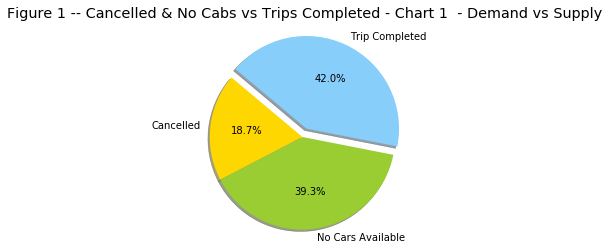

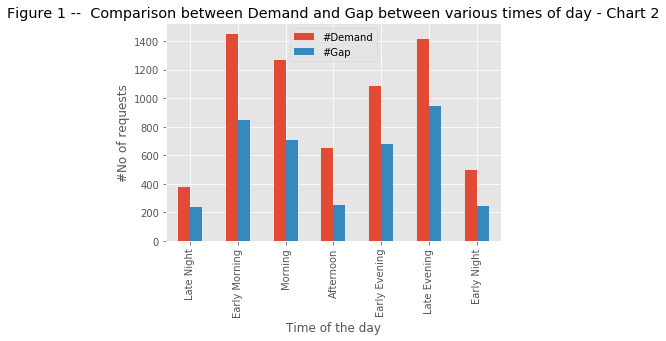

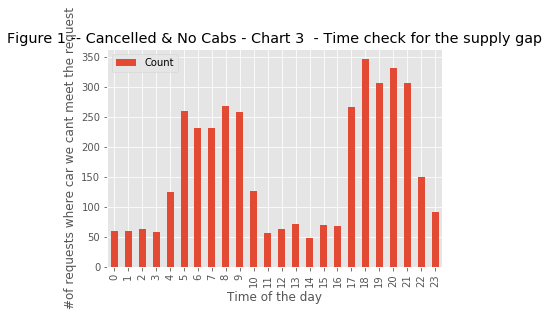

In [14]:
## Plotting of the Charts | Start ##

plt.figure(1)

labels = ['Cancelled','No Cars Available','Trip Completed']
sizes = [cnt_CNC,cnt_NCA,cnt_TC]
colors = ['gold', 'yellowgreen', 'lightskyblue']


plt.pie(sizes,labels=labels,colors=colors,autopct='%1.1f%%',shadow=True,startangle=140,explode=[0,0,0.1])
plt.axis('equal')
plt.title('Figure 1 -- Cancelled & No Cabs vs Trips Completed - Chart 1  - Demand vs Supply')
plt.plot


## **********************************  INFORMATION  ************************************
## ** From the above plot we can see that Only 42% of the Trips gets completed  -
## ** and a huge percentage of 58% in total are either Cancelled or No Cars were available
## ** This 58% is the Gap where there is no supply of cars for the requests from customers
## *************************************************************************************


uber_demand_supply_gap.plot.bar()
plt.title('Figure 1 --  Comparison between Demand and Gap between various times of day - Chart 2')
plt.ylabel('#No of requests')
plt.xlabel('Time of the day')
plt.plot()

uber_cnc_cna_cnt.plot.bar()
plt.title('Figure 1 -- Cancelled & No Cabs - Chart 3  - Time check for the supply gap')
plt.ylabel('#of requests where car we cant meet the request')
plt.xlabel('Time of the day')
plt.plot()





## **********************************  INFORMATION  ************************************
## ** The Chart 2 and Chart 3 are more to anylyze when Cancelled cabs is the most in a day
## ** Chart 2 gives a details of the time of the day
## ** Whereas the Chart 3 gives a concise Chart 2 with counts shown with the part of the day
## *************************************************************************************




In [18]:
uber_cnc_cna_cnt

,Count,time_bins
0,59,Late Night
1,60,Late Night
2,62,Late Night
3,58,Late Night
4,125,Early Morning
5,260,Early Morning
6,231,Early Morning
7,232,Early Morning
8,268,Morning
9,258,Morning


<Figure size 432x288 with 0 Axes>

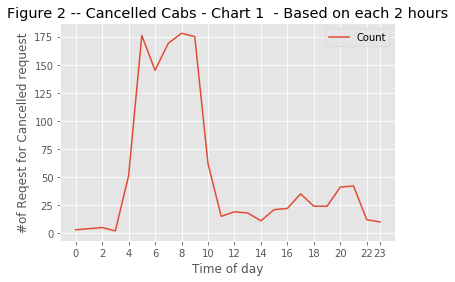

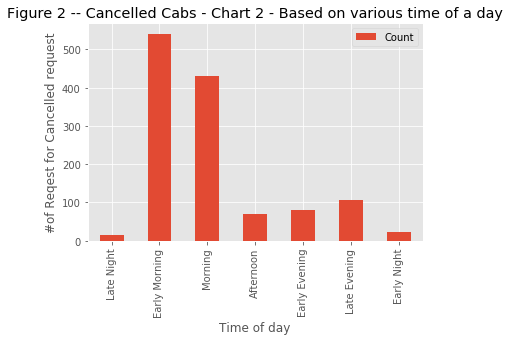

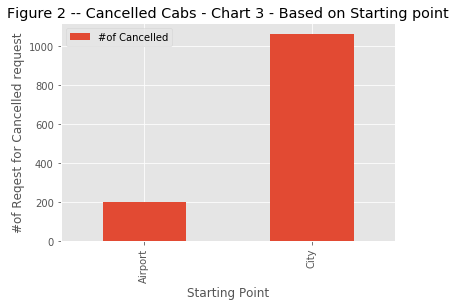

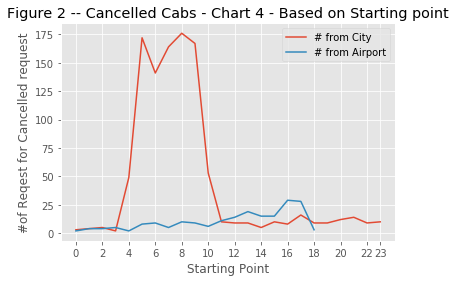

,request_time,# from City
0,00,3
1,01,4
2,02,5
3,03,2
4,04,49
5,05,172
6,06,141
7,07,164
8,08,176
9,09,167


In [20]:

plt.figure(2)
uber_cnc_cnt.plot.line()
plt.title('Figure 2 -- Cancelled Cabs - Chart 1  - Based on each 2 hours')
plt.ylabel("#of Reqest for Cancelled request")
plt.xlabel('Time of day')
plt.xticks([0,2,4,6,8,10,12,14,16,18,20,22,23])
plt.show()



uber_cnc_cnt_tb.plot.bar()
plt.title('Figure 2 -- Cancelled Cabs - Chart 2 - Based on various time of a day')
plt.ylabel("#of Reqest for Cancelled request")
plt.xlabel('Time of day')
plt.show()


uber_cnc_pcp.plot.bar()
plt.title('Figure 2 -- Cancelled Cabs - Chart 3 - Based on Starting point')
plt.ylabel("#of Reqest for Cancelled request")
plt.xlabel('Starting Point')
#plt.xticks([0,2,4,6,8,10,12,14,16,18,20,22,23])
plt.show()

ax = uber_by_pkp_city.plot()
plt.title('Figure 2 -- Cancelled Cabs - Chart 4 - Based on Starting point')
plt.ylabel("#of Reqest for Cancelled request")
plt.xlabel('Starting Point')
plt.xticks([0,2,4,6,8,10,12,14,16,18,20,22,23])
uber_by_pkp_ap.plot(ax=ax)
plt.show()

## **********************************  INFORMATION  ************************************
## ** The Chart 1 gives the vizualization of the time when the Cancelled cabs are most (each 2 hours)
## ** Chart 2 gives a concise Chart 1 where the count shown with the part of the day 
## ** Chart 3 gives most number of Cancellation from which starting point
## ** Chart 4 gives variation of the number of Cancelled cabs with time and from which source
## *************************************************************************************
uber_by_pkp_city

<Figure size 432x288 with 0 Axes>

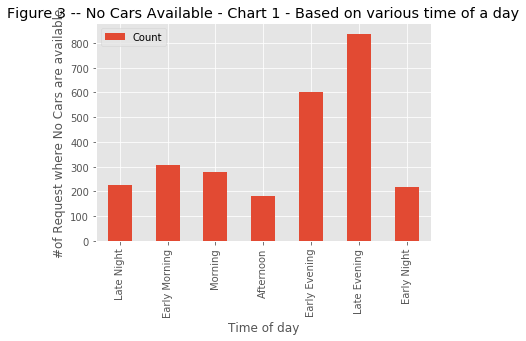

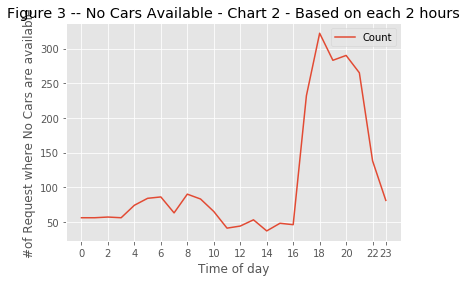

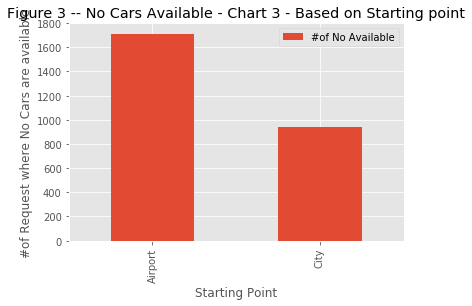

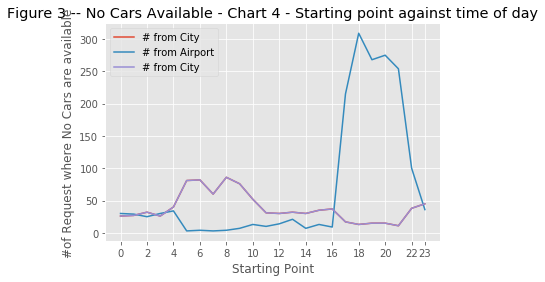

In [26]:
plt.figure(3)
uber_cna_cnt_tb.plot.bar()
plt.title('Figure 3 -- No Cars Available - Chart 1 - Based on various time of a day')
plt.ylabel("#of Request where No Cars are available")
plt.xlabel('Time of day')
plt.show()

uber_cna_cnt.plot.line()
plt.title('Figure 3 -- No Cars Available - Chart 2 - Based on each 2 hours')
plt.ylabel("#of Request where No Cars are available")
plt.xlabel('Time of day')
plt.xticks([0,2,4,6,8,10,12,14,16,18,20,22,23])
plt.show()


uber_cna_pcp.plot.bar()
plt.title('Figure 3 -- No Cars Available - Chart 3 - Based on Starting point')
plt.ylabel("#of Request where No Cars are available")
plt.xlabel('Starting Point')
plt.show()

ax = uber_by_pkp_na_city.plot()
plt.title('Figure 3 -- No Cars Available - Chart 4 - Starting point against time of day')
plt.ylabel("#of Request where No Cars are available")
plt.xlabel('Starting Point')
plt.xticks([0,2,4,6,8,10,12,14,16,18,20,22,23])
uber_by_pkp_na_ap.plot(ax=ax)
uber_by_pkp_na_city.plot(ax=ax)
#ax.text(10,-2.1,'EText',style='italic')
#ax.annotate("Text",xy=(10, 5),xycoords='data',xytext=(10.5, 0),textcoords='data',arrowprops=dict(arrowstyle="->",connectionstyle="arc3"),)
plt.show()


## **********************************  INFORMATION  ************************************
## ** The Chart 1 gives the vizualization where the count shown with the part of the day
## ** Chart 2 gives count of requests where no cars are available every 2 hours scale  
## ** Chart 3 gives most number of requests are generating from which source for which No Cars are available
## ** Chart 4 gives variation of the number of requests with No Cars with time and from which source
## *************************************************************************************


In [25]:
uber_by_pkp_na_ap

,request_time,# from Airport
0,00,30
1,01,29
2,02,25
3,03,30
4,04,34
5,05,3
6,06,4
7,07,3
8,08,4
9,09,7
